In [1]:
%load_ext autoreload
%autoreload 2

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import torch
from omegaconf import OmegaConf
from hydra import compose, initialize
from omegaconf import OmegaConf
from hydra.utils import instantiate
from importlib.util import find_spec
if find_spec("text_recognizer") is None:
    import sys
    sys.path.append('..')

from text_recognizer.data.iam_lines import IAMLines

In [2]:
!ulimit -n 65000

zsh:ulimit:1: value exceeds hard limit


In [3]:
def load_config(path: str):
    with open(path, "rb") as f:
        return OmegaConf.load(f)

In [4]:
datamodule_path = "../training/conf/datamodule/iam_lines.yaml"
mapping_path = "../training/conf/mapping/characters.yaml"
data_cfg = load_config(datamodule_path)
mapping_cfg = load_config(mapping_path)

In [5]:
datamodule = instantiate(data_cfg, mapping=mapping_cfg)
datamodule.prepare_data()
datamodule.setup()
print(datamodule)

IAM Lines dataset
Num classes: 58
Input dims: (1, 56, 1024)
Output dims: (89, 1)
Train/val/test sizes: 9116, 2279, 1958
Train Batch x stats: (torch.Size([8, 1, 56, 1024]), torch.float32, tensor(0.), tensor(0.0440), tensor(0.1139), tensor(1.))
Train Batch y stats: (torch.Size([8, 89]), torch.int64, tensor(1), tensor(52))
Test Batch x stats: (torch.Size([8, 1, 56, 1024]), torch.float32, tensor(0.), tensor(0.0333), tensor(0.0951), tensor(0.8627))
Test Batch y stats: (torch.Size([8, 89]), torch.int64, tensor(1), tensor(52))



In [6]:
dataset = datamodule.data_train

In [7]:
def convert_y_label_to_string(y, datamodule=datamodule):
    return ''.join([datamodule.mapping[i] for i in y if i != 3])

convert_y_label_to_string(dataset[0][1])

'<s>union would be prepared to reach<e>'

In [13]:
dataset[0][1]

tensor([ 1, 34, 27, 22, 28, 27, 40, 36, 28, 34, 25, 17, 40, 15, 18, 40, 29, 31,
        18, 29, 14, 31, 18, 17, 40, 33, 28, 40, 31, 18, 14, 16, 21,  2,  3,  3,
         3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,
         3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,
         3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3])

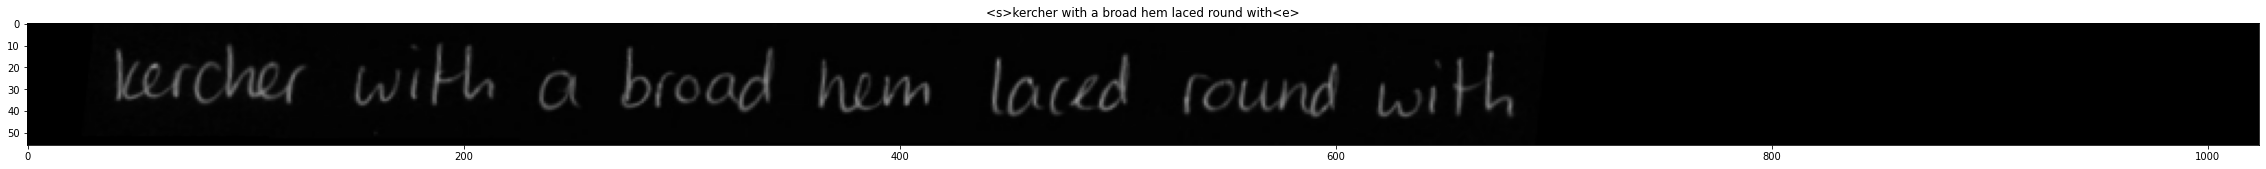

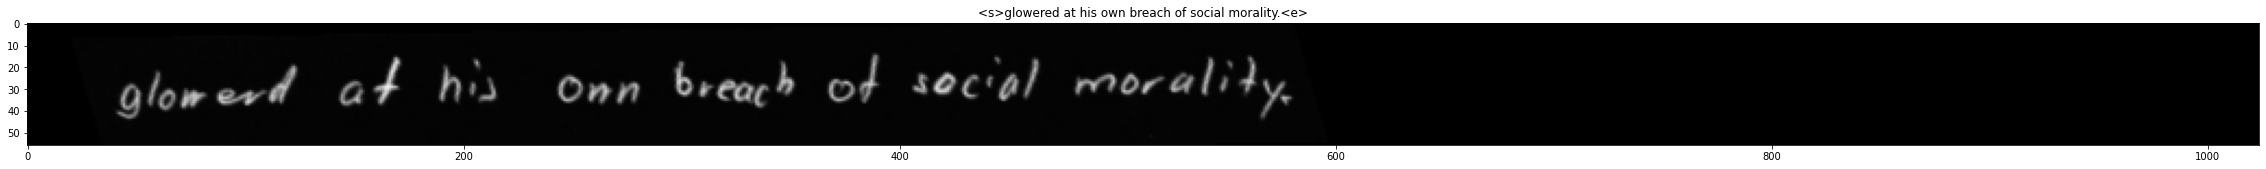

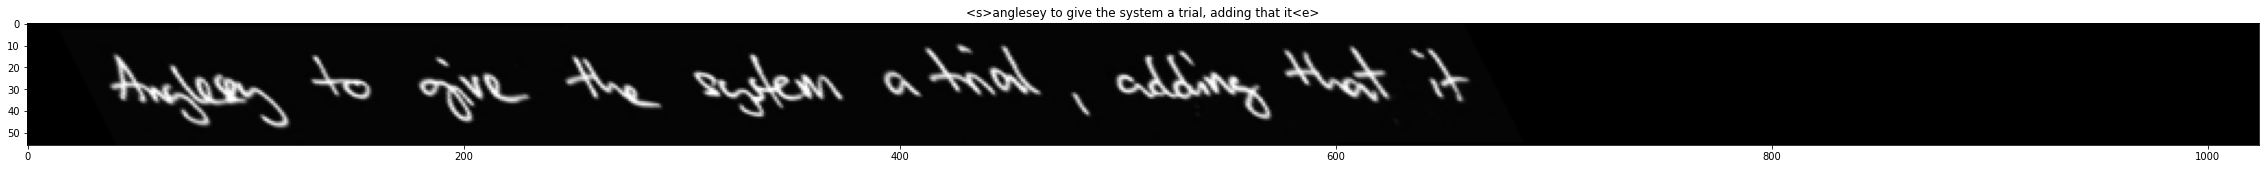

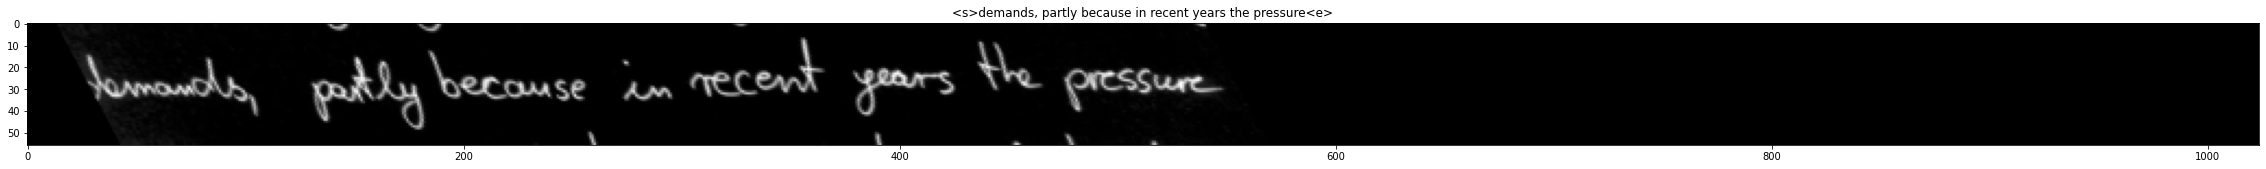

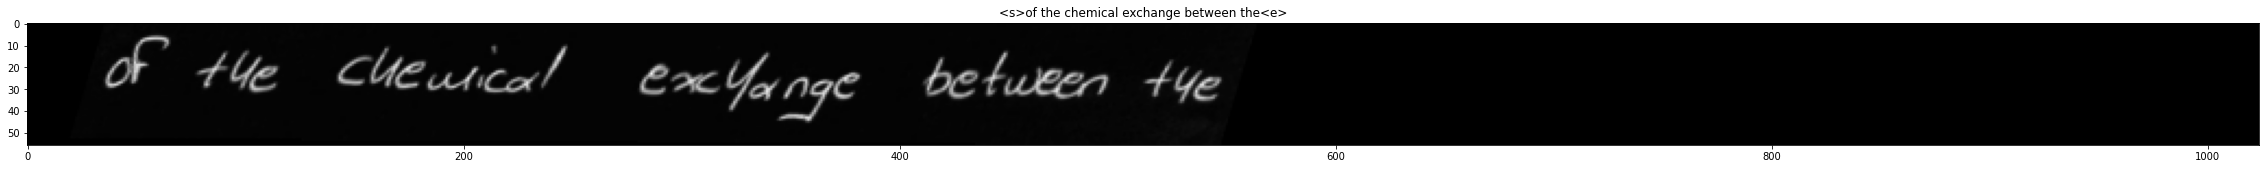

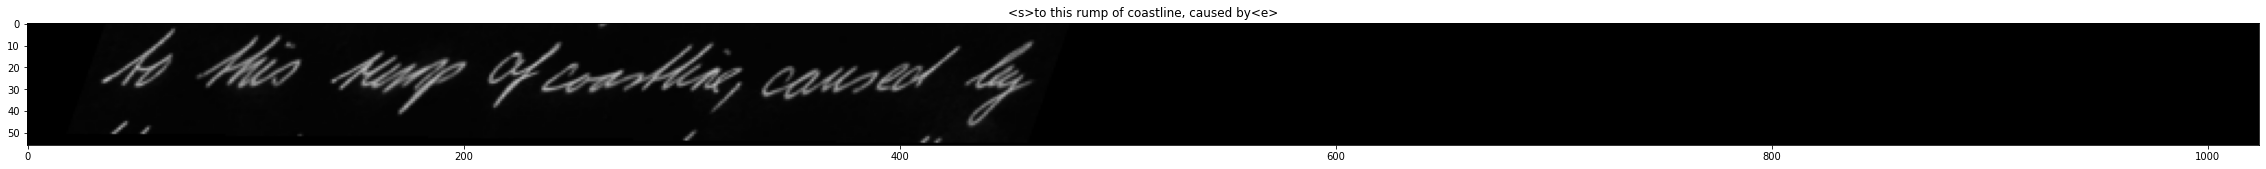

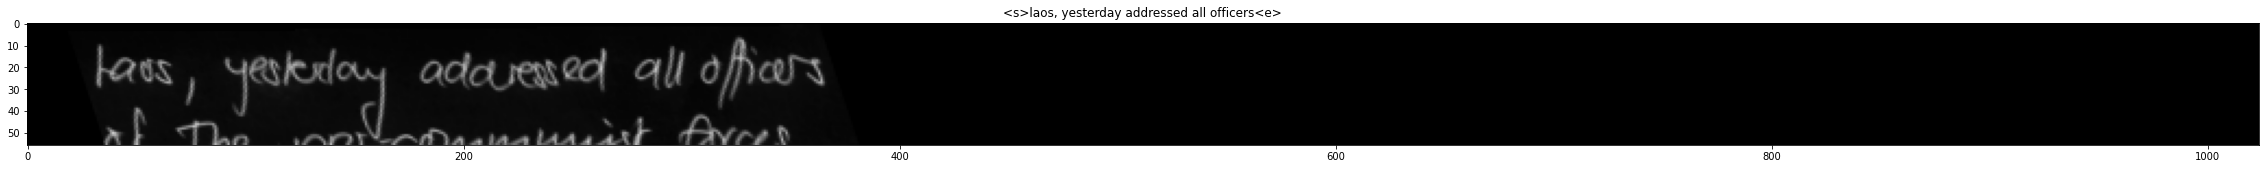

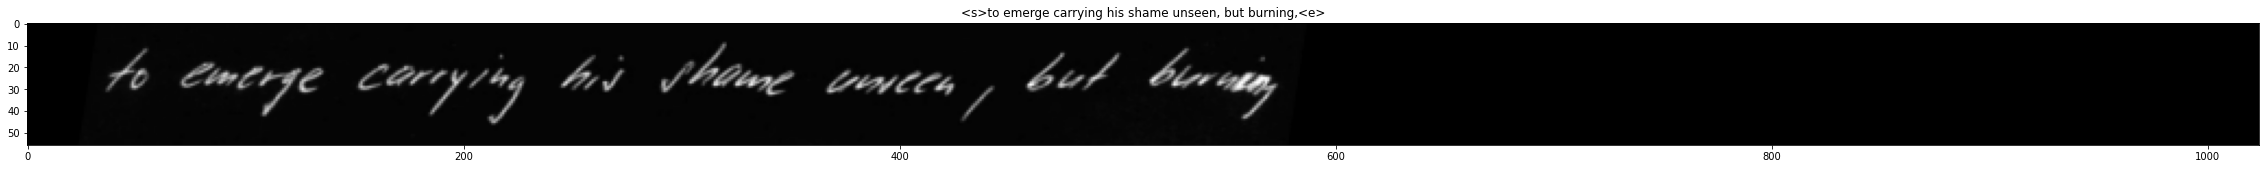

In [12]:
X, Y = next(iter(datamodule.train_dataloader()))
for i in range(8):
    plt.figure(figsize=(40, 20))
    x, y = X[i], Y[i]
    sentence = convert_y_label_to_string(y)
    plt.imshow(x.squeeze(), cmap='gray', vmin=0, vmax=1)
    plt.title(sentence)

In [23]:
t = torch.arange(0, 10)
tt = torch.arange(11, 21)

In [24]:
t = torch.stack((t, tt))

In [27]:
t.t().flatten()

tensor([ 0, 11,  1, 12,  2, 13,  3, 14,  4, 15,  5, 16,  6, 17,  7, 18,  8, 19,
         9, 20])